In [2]:
import pandas as pd
import numpy as np 
# Load the Excel file
df = pd.read_excel("data_a.xlsx",header=None,  engine="openpyxl")  # specify the correct filename

# Extract the first column as a list (array)
first_column = df.iloc[:, 0].tolist()

# Print the result
print(len(first_column))


101


In [3]:
L = np.empty(4, dtype=object) 
for i in range(4):
    L[i] = df.iloc[:, i].tolist()



In [4]:
L

array([list([190, 196, 235, 184, 199, 189, 186, 194, 186, 196, 210, 197, 181, 177, 182, 193, 182, 182, 184, 186, 185, 174, 185, 192, 176, 213, 192, 180, 186, 193, 214, 189, 212, 196, 206, 188, 207, 191, 202, 183, 178, 194, 194, 173, 190, 182, 194, 187, 204, 210, 193, 219, 193, 205, 170, 182, 186, 189, 186, 215, 191, 199, 181, 186, 193, 192, 194, 183, 182, 174, 197, 187, 173, 210, 196, 194, 224, 185, 196, 218, 189, 193, 203, 195, 210, 182, 195, 223, 173, 237, 183, 178, 201, 167, 169, 209, 209, 173, 200, 206, 200]),
       list([14, 23, 23, 27, 17, 19, 17, 22, 20, 21, 23, 20, 16, 11, 23, 21, 21, 13, 15, 17, 24, 27, 13, 14, 29, 25, 12, 13, 9, 15, 22, 17, 18, 20, 14, 21, 20, 22, 30, 14, 19, 16, 18, 15, 13, 22, 26, 23, 19, 24, 19, 23, 22, 22, 16, 20, 12, 21, 12, 19, 27, 25, 19, 24, 21, 21, 21, 23, 20, 19, 21, 22, 16, 20, 20, 19, 22, 18, 12, 14, 17, 16, 16, 17, 18, 18, 27, 20, 17, 22, 18, 19, 19, 14, 24, 10, 18, 19, 23, 15, 24]),
       list([21, 31, 19, 19, 17, 28, 22, 23, 16, 27, 20, 18, 2

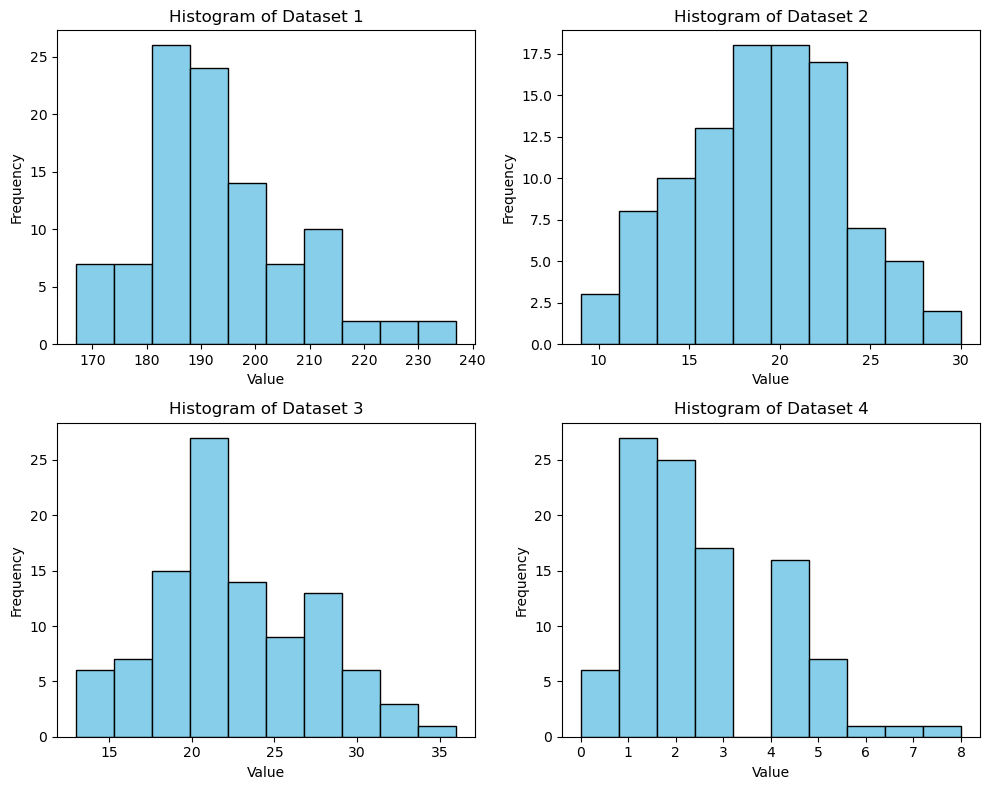

In [5]:
import matplotlib.pyplot as plt

# Assume L[0], L[1], L[2], L[3] are your datasets
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid

for i in range(4):
    row = i // 2
    col = i % 2
    axs[row, col].hist(L[i], bins=10, color='skyblue', edgecolor='black')
    axs[row, col].set_title(f"Histogram of Dataset {i+1}")
    axs[row, col].set_xlabel("Value")
    axs[row, col].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [6]:
# Create a DataFrame from your list of arrays
df_out = pd.DataFrame({
    "Col1": L[0],
    "Col2": L[1],
    "Col3": L[2],
    "Col4": L[3]
})

# Save to a tab-separated text file
df_out.to_csv("output.txt", sep="\t", index=False)


In [58]:
import numpy as np
from ROOT import TH1F, TF1, TCanvas, gStyle, TColor, TPaveText, TLegend

# --- ROOT style settings ---
gStyle.SetOptStat(0)   # No default statistics box
gStyle.SetOptFit(0)    # No automatic fit results
gStyle.SetTitleFont(42, "xyz") # Nicer font
gStyle.SetLabelFont(42, "xyz")
gStyle.SetTitleSize(0.04, "xyz")
gStyle.SetLabelSize(0.03, "xyz")
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadBottomMargin(0.12)
gStyle.SetPadLeftMargin(0.12)
gStyle.SetPadRightMargin(0.08)

# --- Setup canvas ---
c = TCanvas("", "", 800, 600)

# --- Read your data ---
data = np.loadtxt("output.txt", delimiter="\t", skiprows=1)
hist_list=[]
# --- Histogram and fitting loop ---
for i in [3]:
    col1_data = data[:, i]

    # --- Histogram creation ---
    hist = TH1F(f"hist_{i}", f"Barium-133 1s sampling", 8, min(col1_data), max(col1_data))
    hist.SetDirectory(0)
    hist.SetFillColorAlpha(4, 0.4)  # Blue fill with transparency
    hist.SetLineColor(1)
    hist.SetLineWidth(2)
    hist.SetFillStyle(1001)

    for value in col1_data:
        hist.Fill(value)

    # --- Gaussian fit ---
    gauss_fit = TF1(f"gauss_fit_{i}", "[0]*exp(-0.5*((x-[1])/[2])**2)", min(col1_data), max(col1_data))
    gauss_fit.SetParameters(1, (min(col1_data) + max(col1_data)) / 2.0, 4)
    gauss_fit.SetParName(0, "GAmplitude")
    gauss_fit.SetParName(1, "GMean")
    gauss_fit.SetParName(2, "GSigma")
    gauss_fit.SetLineColor(TColor.GetColor(0, 200, 0))  # Green
    gauss_fit.SetLineWidth(3)
    hist.Fit(gauss_fit, "Q")  # Quiet fitting

    # Store Gaussian parameters
    gauss_params = [gauss_fit.GetParameter(j) for j in range(3)]
    gauss_errors = [gauss_fit.GetParError(j) for j in range(3)]

    # --- Poisson fit ---
    poisson_fit = TF1(f"poisson_fit_{i}", "[0] * TMath::Poisson(x, [1])", 0, max(col1_data))
    poisson_fit.SetParameters(1, (min(col1_data) + max(col1_data)) / 2.0)
    poisson_fit.SetParName(0, "PAmplitude")
    poisson_fit.SetParName(1, "PLambda")
    poisson_fit.SetLineColor(TColor.GetColor(255, 0, 0))  # Red
    poisson_fit.SetLineWidth(3)
    hist.Fit(poisson_fit, "Q")

    # Store Poisson parameters
    poisson_params = [poisson_fit.GetParameter(j) for j in range(2)]
    poisson_errors = [poisson_fit.GetParError(j) for j in range(2)]
    hist_list.append(hist)
    # --- Draw everything ---
    hist.Draw()
    gauss_fit.Draw("same")
    poisson_fit.Draw("same")

    # --- Add custom parameter box (TPaveText) ---
    stats_box = TPaveText(0.6, 0.6, 0.88, 0.83, "NDC")
    stats_box.SetFillColor(0)
    stats_box.SetTextFont(42)
    stats_box.SetTextSize(0.03)
    stats_box.SetBorderSize(1)

    stats_box.AddText("Gaussian Fit:")
    stats_box.AddText(f"Mean = {gauss_params[1]:.3f} ± {gauss_errors[1]:.3f}")
    stats_box.AddText(f"Sigma = {-gauss_params[2]:.3f} ± {gauss_errors[2]:.3f}")
    stats_box.AddText("Poisson Fit:")
    stats_box.AddText(f"Lambda = {poisson_params[1]:.3f} ± {poisson_errors[1]:.3f}")
    stats_box.Draw()

    # --- Add a legend ---
    legend = TLegend(0.55, 0.4, 0.85, 0.5)
    legend.AddEntry(gauss_fit, "Gaussian Fit", "l")
    legend.AddEntry(poisson_fit, "Poisson Fit", "l")
    legend.SetBorderSize(0)
    legend.SetFillStyle(0)
    legend.SetTextSize(0.03)
    legend.Draw()

    c.Update()



In [59]:
from ROOT import TH1F, TF1, TCanvas, gStyle, TColor, TLegend
gStyle.SetOptFit(1111); 
c = TCanvas("", "", 800, 600)
# Step 1: Read the data from the text file
data = np.loadtxt("output.txt", delimiter="\t", skiprows=1)  # Skip the header row
hist_list=[]
# Extract the first column (Col1)
for i in range(4):
    col1_data = data[:, i]

    hist = TH1F("", f"Dataset {i+1}", 8, min(col1_data), max(col1_data))
    hist.SetDirectory(0)
    hist.SetFillColorAlpha(4, 0.4)  # Blue fill with 40% transparency
    hist.SetLineColor(1)            # Black border
    hist.SetLineWidth(2)
    hist.SetFillStyle(1001)   
    for value in col1_data:
        hist.Fill(value)

    gauss_fit = TF1("gauss_fit", "[0]*exp(-0.5*((x-[1])/[2])**2)", min(col1_data), max(col1_data))
    gauss_fit.SetParameters(1, (min(col1_data) + max(col1_data)) / 2.0, 4)
    gauss_fit.SetParName(0, "GAmplitude")
    gauss_fit.SetParName(1, "GMean")
    gauss_fit.SetParName(2, "GSigma")
    gauss_fit.SetLineColor(TColor.GetColor(0, 200, 0))  
    gauss_fit.SetLineWidth(3)
    hist.Fit(gauss_fit, "S")  # Fit using Gaussian (drawn automatically)
    print(f"Fitting Gaussian: \n mean={gauss_fit.GetParameter(1):.5g}---sigma={gauss_fit.GetParameter(2):.5g}")
    # Step 4: Poisson fit
    poisson_fit = TF1("poisson_fit", "[0] * TMath::Poisson(x, [1])", 0, max(col1_data))
    poisson_fit.SetParameters(1, (min(col1_data) + max(col1_data)) / 2.0)  # Set initial values for Poisson fit
    poisson_fit.SetParName(0, "PAmplitude")
    poisson_fit.SetParName(1, "PLambda")
    poisson_fit.SetLineColor(TColor.GetColor(255, 0, 0))
    poisson_fit.SetLineWidth(3)
    hist.Fit(poisson_fit, "S")  # Fit using Poisson
    print(f"Fitting Poisson: \n mean={poisson_fit.GetParameter(1):.5g}---sigma(mean^(1/2))={np.sqrt(poisson_fit.GetParameter(1)):.5g}")
    hist_list.append(hist)
    # Step 5: Draw the histogram and fits
    hist.Draw()
    gauss_fit.Draw("same")
    poisson_fit.Draw("same")
    
    legend = TLegend(0.55, 0.65, 0.88, 0.88)  # Adjust position
    legend.SetBorderSize(0)
    legend.SetFillStyle(0)
    legend.SetTextFont(2)
    legend.AddEntry(gauss_fit, "Gaussian Fit", "l")
    legend.AddEntry(poisson_fit, "Poisson Fit", "l")
    legend.Draw()

    c.Update()

Fitting Gaussian: 
 mean=190.8---sigma=14.254
Fitting Poisson: 
 mean=191.09---sigma(mean^(1/2))=13.823
Fitting Gaussian: 
 mean=19.269---sigma=-4.0959
Fitting Poisson: 
 mean=19.177---sigma(mean^(1/2))=4.3792
Fitting Gaussian: 
 mean=22.294---sigma=5.2273
Fitting Poisson: 
 mean=22.415---sigma(mean^(1/2))=4.7344
Fitting Gaussian: 
 mean=2.7897---sigma=1.5616
Fitting Poisson: 
 mean=2.8557---sigma(mean^(1/2))=1.6899
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       1.7893
NDf                       =            5
Edm                       =  2.37166e-06
NCalls                    =          153
GAmplitude                =      25.1979   +/-   3.44351     
GMean                     =      190.803   +/-   1.63638     
GSigma                    =      14.2536   +/-   1.63215     
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1.57962
NDf                       =            6
Edm   